# <center> 10 Python DataFrame Workshop

## **READING THE DATA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airbnb = pd.read_excel("Airbnb.xlsx")

## **EXPLORING THE DATA**

In [45]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1211 non-null   int64  
 1   host_id                         1211 non-null   int64  
 2   host_name                       1210 non-null   object 
 3   neighbourhood_group             1211 non-null   object 
 4   neighbourhood                   1211 non-null   object 
 5   room_type                       1211 non-null   object 
 6   price                           1211 non-null   int64  
 7   minimum_nights                  1211 non-null   int64  
 8   number_of_reviews               1211 non-null   int64  
 9   last_review                     1161 non-null   float64
 10  reviews_per_month               1161 non-null   float64
 11  calculated_host_listings_count  1211 non-null   int64  
 12  availability_365                12

In [34]:
airbnb.columns

Index(['id', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'rating'],
      dtype='object')

In [ ]:
airbnb.head(5)

## **CLEANING THE DATA**

In [ ]:
airbnb.neighbourhood_group.unique()

In [ ]:
airbnb.neighbourhood.unique()

In [ ]:
airbnb.room_type.unique()

In [3]:
cleaned_airbnb = airbnb.replace("Brooklynn","Brooklyn",regex=True)
cleaned_airbnb = cleaned_airbnb.replace("Privaate room","Private room",regex=True)
#cleaned_airbnb.neighbourhood_group.unique()
#cleaned_airbnb.neighbourhood.unique()
#cleaned_airbnb.room_type.unique()

In [ ]:
cleaned_airbnb.duplicated().sum()

In [4]:
cleaned_airbnb = cleaned_airbnb.drop_duplicates()
cleaned_airbnb.duplicated().sum()

0

### The data has been polished up under df "cleaned_airbnb". Let us now ravage through and analyze the jungle for some gems!

## **ANALYZING THE DATA**

Guiding Questions:
1. What's the average room price in each borough?
2. What neighborhood has the most expensive rentals (max of mean)?
3. What type of room costs the most? The least?
4. Are higher ratings correlated with higher prices?
5. Are hosts with more rentals more likely to receive higher ratings?
6. What's the "best" rental in NYC, considering location, price, and rating? (This is a subjective judgment, but make sure you justify your choice.)

#### 1. What's the average room price in each borough?

In [24]:
#avg room price "price"
#by borough "neighbourhood_group"

avg_price_by_borough = cleaned_airbnb.pivot_table(index="neighbourhood_group", values="price").round(2)
avg_price_by_borough_desc = avg_price_by_borough.sort_values(by="price", ascending=False) # sort by highest -> lowest avg price
avg_price_by_borough_desc

,price
neighbourhood_group,
Manhattan,181.99
Brooklyn,148.76
Queens,96.10
Staten Island,75.21
Bronx,67.65


#### What did we find?

Text(0.5, 1.0, 'Average Room Price by Borough')

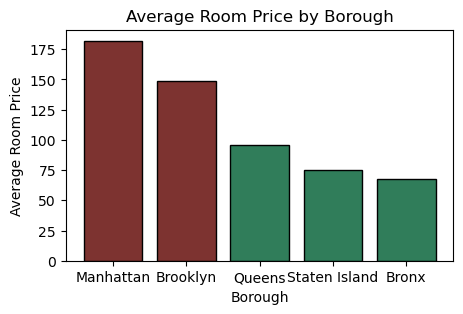

In [64]:
Borough = ["Manhattan", "Brooklyn", "Queens", "Staten Island", "Bronx"]
Price = [181.99, 148.76, 96.10, 75.21, 67.65]


plt.figure(figsize=(5,3))

plt.bar(Borough, Price, color=["#7D3330","#7D3330", "#307D5A","#307D5A","#307D5A"], edgecolor="black")

plt.xlabel("Borough")
plt.ylabel("Average Room Price")
plt.title("Average Room Price by Borough")

#### 2. What neighborhood has the most expensive rentals (max of mean)?

In [ ]:
# max of avg rentals "price"
# by neighborhood "neighbourhood"

In [15]:
max_price_by_neighborhood = cleaned_airbnb.pivot_table(index="neighbourhood", values="price")
max_price_by_neighborhood_desc = max_price_by_neighborhood.sort_values(by="price", ascending=False) # sort by highest -> lowest avg price
max_price_by_neighborhood_desc.head(5)

,price
neighbourhood,
Brooklyn Heights,410.000
Civic Center,328.000
Tribeca,325.000
DUMBO,300.000
Nolita,281.125


In [ ]:
Neighborhood = ["Brooklyn Heights", "Civic Center", "Tribeca", "DUMBO", "Nolita"]
Avg_Price = [410, 328, 325, 300, 281]


plt.figure(figsize=(5,3))

plt.bar(Borough, Price, color=["#DF8B41","#387E74", "#387E74","#387E74","#9977D3"], edgecolor="black")

plt.xlabel("Borough")
plt.ylabel("Average Room Price")
plt.title("Average Room Price by Borough")

In [9]:
# gives max value w/o row!

# max_price_by_neighborhood_1 = cleaned_airbnb.pivot_table(index="neighbourhood", values="price").max()
# max_price_by_neighborhood_1

price    410.0
dtype: float64

#### What did we find?

#### 3. What type of room costs the most? The least?

In [37]:
# "room_type"
# "price"

room_type_price_max = cleaned_airbnb.groupby(["room_type"])["price"].max()
room_type_price_max

room_type
Entire home/apt    2000
Private room       3000
Shared room         115
Name: price, dtype: int64

#### What did we find?

In [41]:
# "room_type"
# "price"

room_type_price_min = cleaned_airbnb.groupby(["room_type"])["price"].min()
room_type_price_min

room_type
Entire home/apt    50
Private room       20
Shared room        39
Name: price, dtype: int64

#### What did we find?

In [77]:
#rooms = ["Private Room", "Entire Home/Apt", "Shared Room"]
#max = [3000, 2000, 115]
#min = [20, 50, 39]

#plt.figure(figsize=(5,3))

#plt.bar(x="rooms", y=["max","min"]) #nope - gotta come back to this
#plt.show()

In [44]:
# "room_type"
# "price

room_type_price_avg = cleaned_airbnb.groupby(["room_type"])["price"].mean().round(2)
room_type_price_avg

room_type
Entire home/apt    196.53
Private room       105.38
Shared room         66.44
Name: price, dtype: float64

#### What did we find?

#### Overall finding?

#### 4. Are higher ratings correlated with higher prices?

In [52]:
# "rating"
# "price"

#rating_desc = cleaned_airbnb.sort_values(by="rating", ascending=False)
#rating_desc

#high_rating_high_price = rating_desc.groupby(["rating"])["price"].mean()
#high_rating_high_price

rating
0.000107     68.0
0.000281     89.0
0.000746     88.0
0.001889    150.0
0.002413     75.0
            ...  
0.995634     85.0
0.996396    115.0
0.997041    450.0
0.997701    100.0
0.997866     80.0
Name: price, Length: 1208, dtype: float64

Text(0.5, 1.0, 'Airbnb: Rating vs. Price')

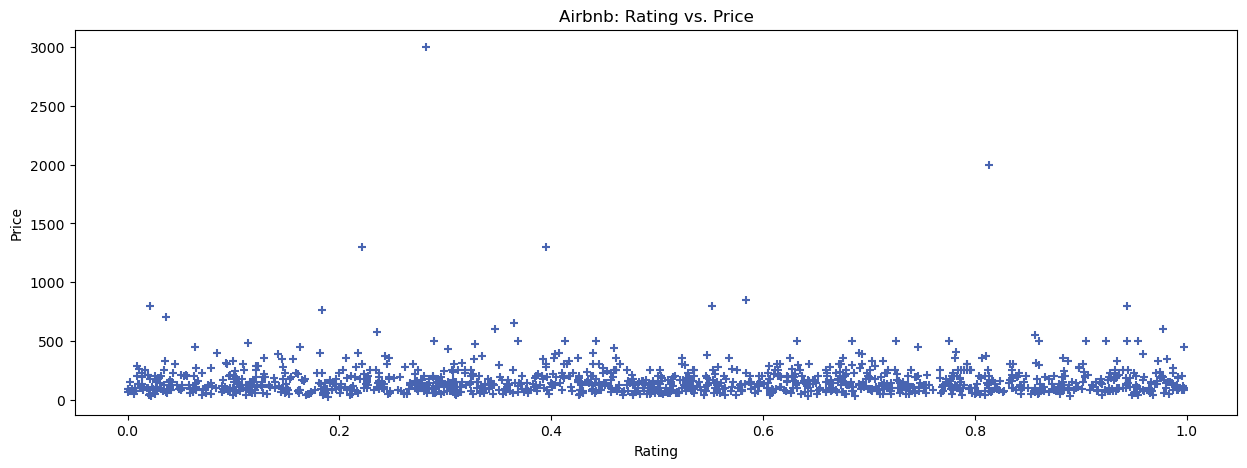

In [59]:
plt.figure(figsize=(15,5))

plt.scatter(cleaned_airbnb['rating'], cleaned_airbnb['price'], marker="+", color="#4864B1")

plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Airbnb: Rating vs. Price')

#### 5. Are hosts with more rentals more likely to receive higher ratings?

#### 6. What's the "best" rental in NYC, considering location, price, and rating? (This is a subjective judgment, but make sure you justify your choice.)

### Feedback/Learning from Instructors & Classmates
- Clean the data as you go
- Stylistic cohesion: have a theme for the colors instead of going wild
- Shoulda used .describe()!!!
- How to create plots from pivot tables
- df.corr() - correlation matrix! more next week
- Reset index!!! visualizing pivot tables - more next week :')
- Don't put things in charts that don't clarify - it's all about CLARITY!

# <center> BE KIND... BECAUSE EVERYONE IS GOING THROUGH SOMETHING YOU HAVE NO IDEA ABOUT!